# Bibliotecas

In [1]:
import numpy  			 as np
import pandas 			 as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics         import accuracy_score

# Gerando as matrizes

Gerando as matrizes $A$ e $B$

CPF = 123.456.78*-**

In [2]:
A = np.array([
	[1, 2], 
	[3, 4]
])
B = np.array([
    [5, 6], 
    [7, 8]
])

print("A =\n", A)
print("B =\n", B)

A =
 [[1 2]
 [3 4]]
B =
 [[5 6]
 [7 8]]


Gerando as matrizes $X_1$ e $X_2$

In [3]:
X1 = np.random.normal(
	loc   = 0,
	scale = 1,
	size  = (2, 1000)
)

X2 = np.random.normal(
	loc   = 0,
	scale = 1,
	size  = (2, 2000)
)

print("shape X_1 =", X1.shape)
print("shape X_2 =", X2.shape)

shape X_1 = (2, 1000)
shape X_2 = (2, 2000)


Gerando as matrizes $Y_1$ e $Y_2$

In [4]:
Y1 = A @ X1
Y2 = B @ X2

print("shape Y_1 =", Y1.shape)
print("shape Y_2 =", Y2.shape)

shape Y_1 = (2, 1000)
shape Y_2 = (2, 2000)


Gerando as matrizes $Z_1$ e $Z_2$ com $k = 0$

In [5]:
M = np.ones((2, 2000))
k = 0

Z1 = Y1
Z2 = Y2 + k * M

print("shape Z_1 =", Z1.shape)
print("shape Z_2 =", Z2.shape)

shape Z_1 = (2, 1000)
shape Z_2 = (2, 2000)


# Construído o dataset

In [6]:
classA = pd.DataFrame(
	data    = Z1.T,
	columns = ['f1', 'f2']
)

classA['class'] = 'A'

classB = pd.DataFrame(
	data    = Z2.T,
	columns = ['f1', 'f2']
)

classB['class'] = 'B'

In [7]:
classA.head()

,f1,f2,class
0,0.401384,1.928150,A
1,-1.296570,-1.668800,A
2,5.420125,11.419460,A
3,0.257451,1.742642,A
4,1.916902,5.081601,A


In [8]:
classB.head()

,f1,f2,class
0,9.224813,12.639993,B
1,-9.498947,-12.851791,B
2,1.311061,1.865041,B
3,1.602114,2.012570,B
4,5.936319,8.058987,B


In [9]:
dataset = pd.concat([
	classA, 
	classB
]).reset_index(drop = True)

dataset.sample(5)

,f1,f2,class
1414,12.322380,16.950033,B
2382,0.953300,0.971740,B
1874,-9.768222,-13.244374,B
2312,3.514804,4.838125,B
663,-0.770278,-2.250510,A


In [10]:
np.round(dataset.describe(), 3)

,f1,f2
count,3000.000,3000.000
mean,-0.052,-0.076
std,6.543,9.180
min,-25.513,-34.529
25%,-3.298,-5.329
50%,-0.035,-0.057
75%,3.131,5.102
max,30.441,41.843


# Normalizando o dataset

In [11]:
dataset['f1'] = (dataset['f1'] - dataset['f1'].mean()) / dataset['f1'].std()
dataset['f2'] = (dataset['f2'] - dataset['f2'].mean()) / dataset['f2'].std()

In [12]:
np.round(dataset.describe(), 3)

,f1,f2
count,3000.000,3000.000
mean,0.000,-0.000
std,1.000,1.000
min,-3.891,-3.753
25%,-0.496,-0.572
50%,0.003,0.002
75%,0.486,0.564
max,4.661,4.566


# Explorando o dataset

Balanceamento do dataset

In [13]:
dataset['class'].value_counts(normalize = True)

class
B    0.666667
A    0.333333
Name: proportion, dtype: float64

Histograma dos atributos

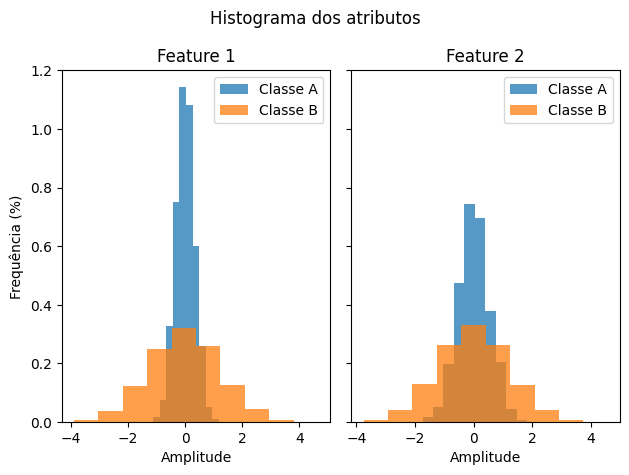

In [14]:
f1 = dataset[['f1', 'class']]
f2 = dataset[['f2', 'class']]

figure, axes = plt.subplots(
	nrows  = 1,
	ncols  = 2,
	sharey = True
)

figure.suptitle("Histograma dos atributos")

axes[0].hist(
	f1[f1['class'] == 'A']['f1'], 
	density = True, 
	label   = "Classe A", 
	alpha   = 0.75
)
axes[0].hist(
	f1[f1['class'] == 'B']['f1'], 
	density = True, 
	label   = "Classe B", 
	alpha   = 0.75
)

axes[0].set_title("Feature 1")
axes[0].set_xlabel("Amplitude")
axes[0].set_ylabel("Frequência (%)")
axes[0].legend()

axes[1].hist(
	f2[f2['class'] == 'A']['f2'], 
	density = True, 
	label   = "Classe A", 
	alpha   = 0.75
)
axes[1].hist(
	f2[f2['class'] == 'B']['f2'], 
	density = True, 
	label   = "Classe B", 
	alpha   = 0.75
)
axes[1].set_title("Feature 2")
axes[1].set_xlabel("Amplitude")
axes[1].legend()

plt.tight_layout()
plt.show()

plt.close()

Gráfico de dispersão

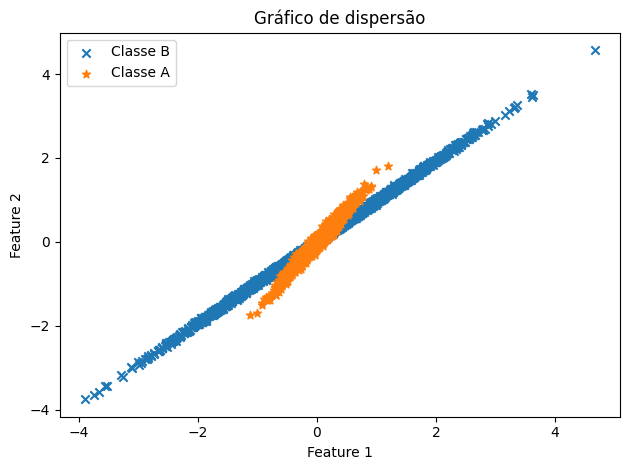

In [15]:
plt.title("Gráfico de dispersão")

plt.scatter(
	x 	   = dataset['f1'][dataset['class'] == 'B'],
	y  	   = dataset['f2'][dataset['class'] == 'B'],
	marker = 'x',
	label  = 'Classe B'
)

plt.scatter(
	x      = dataset['f1'][dataset['class'] == 'A'],
	y 	   = dataset['f2'][dataset['class'] == 'A'],
	marker = '*',
	label  = 'Classe A'
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.legend()
plt.show()

plt.close()

Matriz de correlação

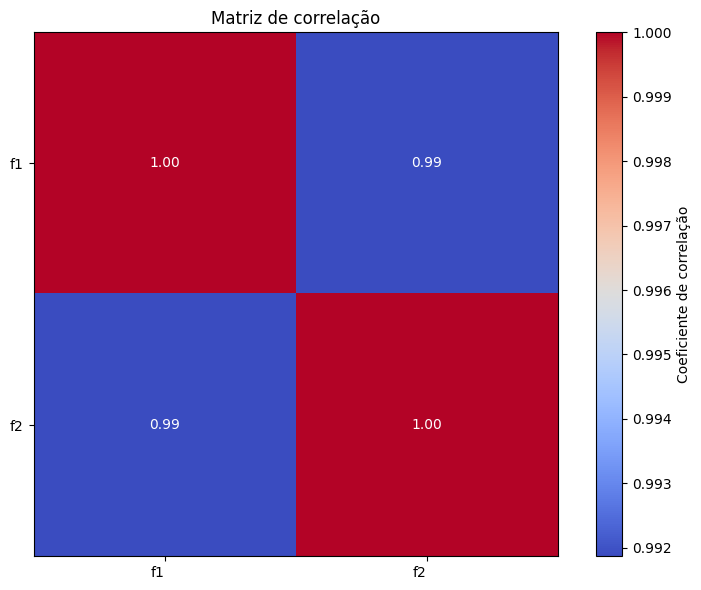

In [16]:
correlationMatrix = dataset[['f1', 'f2']].corr()


figure, axe = plt.subplots(figsize=(8, 6))

plt.title("Matriz de correlação")

image = axe.imshow(
    correlationMatrix, 
    cmap		  = 'coolwarm', 
    interpolation = 'nearest'
)

colorBar = figure.colorbar(image)
colorBar.set_label("Coeficiente de correlação")

axe.set_xticks(np.arange(len(correlationMatrix.columns)))
axe.set_yticks(np.arange(len(correlationMatrix.index)))

axe.set_xticklabels(
    correlationMatrix.columns, 
    ha = 'right'
)
axe.set_yticklabels(correlationMatrix.index)

for i in range(len(correlationMatrix.index)):
    for j in range(len(correlationMatrix.columns)):
        text = axe.text(
            j, 
            i, 
            f'{correlationMatrix.iloc[i, j]:.2f}',
			ha    = "center", 
            va    = "center", 
            color = "white"
        )

plt.tight_layout()
plt.show()
plt.close()

# Construção dos modelos Bayesianos

Detalhes:

1. O método *fit* calcula as características estatísticas da base;
2. O método *discriminant* implementa a função de otimização;

Atributos Gaussianos - Caso geral;

In [17]:
class GeneralBayesian:
	def __init__(self):
		self.classes     = None
		self.features    = None
		self.means       = {}
		self.covariances = {}
		self.priors      = {}
		
	def fit(self, X, y):

		self.features = X.columns
		self.classes  = y.unique()
		
		for c in self.classes:
			XC = X[y == c]
			
			mu  = XC.mean().values

			cov =  np.cov(XC.T)
			cov += np.eye(cov.shape[0]) * 1e-6
			
			self.means[c]       = mu
			self.covariances[c] = cov
			self.priors[c]      = len(XC) / len(X)
			
	def discriminant(self, x, mu, cov, prior):

		meanDiff   = x - mu
		inverseCov = np.linalg.inv(cov)
		detCov     = np.linalg.det(cov)
		term       = meanDiff.T @ inverseCov @ meanDiff

		return -2 * np.log(prior) + np.log(detCov) + term
	
	def predictOne(self, x):
		scores = {}

		for c in self.classes:

			mu    = self.means[c]
			cov   = self.covariances[c]
			prior = self.priors[c]
			
			score     = self.discriminant(x, mu, cov, prior)
			scores[c] = score

		return min(scores, key = scores.get)

	def predict(self, X):
		results = []
		
		for _, row in X.iterrows():

			x = row.values

			result = self.predictOne(x)
			results.append(result)

		return np.array(results)


In [18]:
generalBayesian = GeneralBayesian()

Atributos Gaussianos e descorrelacionados (Naive Bayes);

In [19]:
class NaiveBayes:
	def __init__(self):
		self.classes     = None
		self.features    = None
		self.means       = {}
		self.covariances = {}
		self.priors      = {}
		
	def fit(self, X, y):

		self.features = X.columns
		self.classes  = y.unique()
		
		for c in self.classes:
			XC = X[y == c]
			
			mu  = XC.mean().values
			cov = np.diag(np.var(XC, axis = 0))
			
			self.means[c]       = mu
			self.covariances[c] = cov
			self.priors[c]      = len(XC) / len(X)
			
	def discriminant(self, x, mu, cov, prior):

		meanDiff   = x - mu
		inverseCov = np.linalg.inv(cov)
		detCov     = np.linalg.det(cov)
		term       = meanDiff.T @ inverseCov @ meanDiff

		return -2 * np.log(prior) + np.log(detCov) + term
	
	def predictOne(self, x):
		scores = {}

		for c in self.classes:

			mu    = self.means[c]
			cov   = self.covariances[c]
			prior = self.priors[c]
			
			score     = self.discriminant(x, mu, cov, prior)
			scores[c] = score

		return min(scores, key = scores.get)

	def predict(self, X):
		results = []
		
		for _, row in X.iterrows():

			x = row.values

			result = self.predictOne(x)
			results.append(result)

		return np.array(results)


In [20]:
naiveBayes = NaiveBayes()

Atributos Gaussianos, descorrelacionados e com variâncias iguais;

In [21]:
class ConstantVarianceBayesian:
	def __init__(self):
		self.classes     = None
		self.features    = None
		self.means       = {}
		self.priors      = {}
		
	def fit(self, X, y):

		self.features = X.columns
		self.classes  = y.unique()
		
		for c in self.classes:
			XC = X[y == c]
			
			mu  = XC.mean().values
			
			self.means[c]  = mu
			self.priors[c] = len(XC) / len(X)
			
	def discriminant(self, x, mu, prior):

		distance = np.linalg.norm(x - mu) ** 2

		return distance - 2 * np.log(prior) 


	def predictOne(self, x):
		scores = {}

		for c in self.classes:

			mu    = self.means[c]
			prior = self.priors[c]
			
			score     = self.discriminant(x, mu, prior)
			scores[c] = score

		return min(scores, key = scores.get)

	def predict(self, X):
		results = []
		
		for _, row in X.iterrows():

			x = row.values

			result = self.predictOne(x)
			results.append(result)

		return np.array(results)


In [22]:
cvBayesian = ConstantVarianceBayesian()

Atributos Gaussianos, descorrelacionados, com variâncias iguais e
classes equiprováveis;

In [23]:
class ConstantVarianceWithEquiprobableBayesian:
	def __init__(self):
		self.classes     = None
		self.features    = None
		self.means       = {}
		self.priors      = {}
		
	def fit(self, X, y):

		self.features = X.columns
		self.classes  = y.unique()
		
		for c in self.classes:
			XC = X[y == c]
			
			mu             = XC.mean().values
			self.means[c]  = mu
			
	def discriminant(self, x, mu):
		return np.linalg.norm(x - mu) ** 2


	def predictOne(self, x):
		scores = {}

		for c in self.classes:
			mu    = self.means[c]
			
			score     = self.discriminant(x, mu)
			scores[c] = score

		return min(scores, key = scores.get)

	def predict(self, X):
		results = []
		
		for _, row in X.iterrows():

			x = row.values

			result = self.predictOne(x)
			results.append(result)

		return np.array(results)

In [24]:
cveBayesian = ConstantVarianceWithEquiprobableBayesian()

LDA seguido de um classificador unidimensional baseado em limiar

In [25]:
class LDA:
	def __init__(self):
		self.w          = None
		self.classMeans = None

	def fit(self, X, y):
		classes = np.unique(y)

		X0 = X[y == classes[0]]
		X1 = X[y == classes[1]]
		
		mean0 = np.mean(X0, axis = 0)
		mean1 = np.mean(X1, axis = 0)

		SW = np.cov(X0, rowvar = False) + np.cov(X1, rowvar = False)

		self.w = np.linalg.inv(SW).dot(mean1 - mean0)
		
		self.classMeans = {
			classes[0]: mean0,
			classes[1]: mean1
		}
		self.classes = classes

	def predictOne(self, x):
		
		proj = x.dot(self.w)
		
		meanProj0 = self.classMeans[self.classes[0]].dot(self.w)
		meanProj1 = self.classMeans[self.classes[1]].dot(self.w)

		if abs(proj - meanProj0) < abs(proj - meanProj1):
			return self.classes[0]
		
		return self.classes[1]
		
	def predict(self, X):
		results = []
		
		for _, row in X.iterrows():

			x = row.values

			result = self.predictOne(x)
			results.append(result)

		return np.array(results)

In [26]:
lda = LDA()

Modelos

In [27]:
models = [
	{
		"name": "Geral",
		"model": generalBayesian,
		"scores": []
	},
	{
		"name": "Naive Bayes",
		"model": naiveBayes,
		"scores": []
	},
	{
		"name": "Variância Constante",
		"model": cvBayesian,
		"scores": []
	},
	{
		"name": "Variância Constante e Equiprovável",
		"model": cveBayesian,
		"scores": []
	},
	{
		"name": "LDA",
		"model": lda,
		"scores": []
	},
]

# Holdout do dataset

In [28]:
XTrain, XTest, yTrain, yTest = train_test_split(
	dataset[['f1', 'f2']],
	dataset['class'],
	train_size   = .70, 
	test_size    = .30, 
	stratify     = dataset['class'],
	random_state = 47
)

# Treinamento usando KFold $(K = 10)$

In [29]:
kFold = StratifiedKFold(
	n_splits     = 10,
	shuffle      = True,
	random_state = 47
)

In [30]:
scores = []

for trainIndexes, testIndexes in kFold.split(XTrain, yTrain):
	
	XTrainFold, XTestFold = XTrain.iloc[trainIndexes], XTrain.iloc[testIndexes]
	yTrainFold, yTestFold = yTrain.iloc[trainIndexes], yTrain.iloc[testIndexes]

	for info in models:
		
		model = info['model']

		model.fit(XTrainFold, yTrainFold)

		YPredicted = model.predict(XTestFold)
		accuracy   = accuracy_score(yTestFold, YPredicted)

		info['scores'].append(accuracy)

scores = np.array(scores)

Resultados

In [31]:
results = pd.DataFrame({
	"Modelo":         [info["name"]            for info in models],
	"Acurácia Média": [np.mean(info["scores"]) for info in models],
	"Desvio Padrão":  [np.std(info["scores"])  for info in models]
})
results = np.round(results, 4)

In [32]:
print(results)

                               Modelo  Acurácia Média  Desvio Padrão
0                               Geral          0.9390         0.0134
1                         Naive Bayes          0.7129         0.0182
2                 Variância Constante          0.6667         0.0000
3  Variância Constante e Equiprovável          0.4952         0.0360
4                                 LDA          0.5014         0.0371


# Teste

Treinando os modelos com a base de treino inteira

In [33]:
for info in models:
	
	model = info["model"]
	model.fit(XTrain, yTrain)

In [34]:
for info in models:
	model = info["model"]
	
	YPredicted = model.predict(XTest)
	accuracy   = accuracy_score(yTest, YPredicted)

	print("Modelo   =", info["name"])
	print("Acurácia =", np.round(accuracy, 4))
	print("-" * 50)

Modelo   = Geral
Acurácia = 0.9356
--------------------------------------------------
Modelo   = Naive Bayes
Acurácia = 0.7178
--------------------------------------------------
Modelo   = Variância Constante
Acurácia = 0.6667
--------------------------------------------------
Modelo   = Variância Constante e Equiprovável
Acurácia = 0.4922
--------------------------------------------------
Modelo   = LDA
Acurácia = 0.4967
--------------------------------------------------


## Comentário sobre a perfomace dos modelos

Analisando os resultados obtidos no Treino com KFold com $ k = 10 $ e Teste, observamos o seguinte: 

1. Em relação ao melhor modelo (o Geral), a acurácia do Naive Bayes diferencia em 12.56%;
2. Em relação ao melhor modelo (o Geral), a acurácia do Variância Constante diferencia em 33%;
3. Em relação ao melhor modelo (o Geral), a acurácia do Variância Constante e Equiprovável diferencia em 45.34%;
4. Em relação ao melhor modelo (o Geral), a acurácia do LDA diferencia em 49.56%;

Essa diferença de perfomace na acurácia é causado pelas suposições cada vez mais restritivas sobre a base de dados que *não são validadas*. Em especial, o modelo LDA não conseguiu encontrar uma reta que melhor projeto os dados.
